# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [63]:
def train(X, T, learning_rate, n_epochs, verbose=False):
    n_samples, n_inputs = X.shape
    
    # Calculate means and standard deviations of each column in X and T
    Xmeans = np.mean(X[:, :], axis=0)
    Tmeans = np.mean(T[:, :], axis=0)

    Xstds = np.std(X[:, :], axis=0)
    Tstds = np.std(T[:, :], axis=0)

    #print("Xmeans shape: ", Xmeans.shape)
    #print("Xstds shape: ", Xstds.shape)
    
    # Use the means and standard deviations to standardize X and T
    Xstd = (X - Xmeans) / Xstds
    Tstd = (T - Tmeans) / Tstds

    # Insert the column of constant 1's as a new initial column in X
    Xb = np.insert(Xstd, 0, 1, axis=1)
    #print("Xb.shape: ", Xb.shape)
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    w = np.zeros((n_inputs + 1, 1)) 
    #print("w.shape: ", w.shape)

    for epoch in range(n_epochs):
        sqerror_sum = 0

        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            # calculate the error, and
            # update the weight values.
            y_pred = Xb[n:n+1, :] @ w
            error = Tstd[n:n+1, :] - y_pred
            w_change = learning_rate * Xb[n:n+1, :].T * error
            w += w_change
            
            # Add the squared error to sqerror_sum
            sqerror_sum += error ** 2
            
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [ ]:
def use(X, model):
    #print("Xmeans shape: ", model["Xmeans"].shape)
    #print("Xstds shape: ", model["Xstds"].shape)
    #print("model w shape: ", model["w"].shape)
    #print("X shape: ", X.shape)
    #print("model w: ", model["w"])

    # Standardize X using Xmeans and Xstds in model
    X = (X - model["Xmeans"]) / model["Xstds"]

    # Predict output values using weights in model
    Xb = np.insert(X, 0, 1, axis=1)
    y_pred = Xb @ model["w"]

    # Unstandardize the predicted output values using Tmeans and Tstds in model
    y_pred = (y_pred * model["Tstds"]) + model["Tmeans"]

    # Return the unstandardized output values
    return y_pred

In [65]:
def rmse(Y, T):
    n_samples, _ = Y.shape
    sqerror_sum = 0

    #print(Y.shape, T.shape)

    for n in range(n_samples):
        error = T[n:n+1, :] - Y[n:n+1, :]
        sqerror_sum += error ** 2
        #print("sqerror_sum: ", sqerror_sum)

    rmse = np.sqrt(sqerror_sum / n_samples)

    return rmse[0, 0]

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

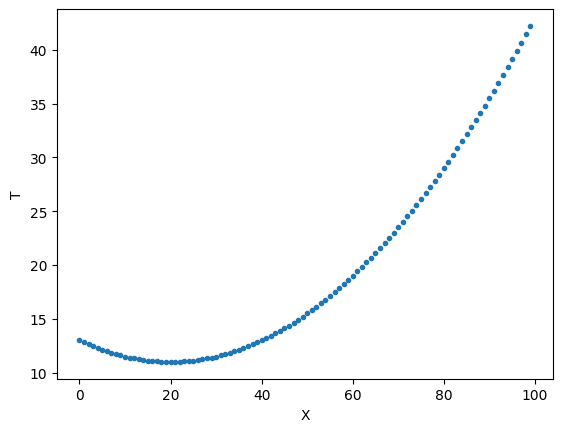

In [5]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [6]:
X.shape, T.shape

((100, 1), (100, 1))

In [7]:
model = train(X, T, 0.01, 50, verbose=True)
model

Epoch 5 RMSE 0.40
Epoch 10 RMSE 0.40
Epoch 15 RMSE 0.40
Epoch 20 RMSE 0.40
Epoch 25 RMSE 0.40
Epoch 30 RMSE 0.40
Epoch 35 RMSE 0.40
Epoch 40 RMSE 0.40
Epoch 45 RMSE 0.40
Epoch 50 RMSE 0.40


{'w': array([[-0.00576098],
        [ 1.05433338]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938])}

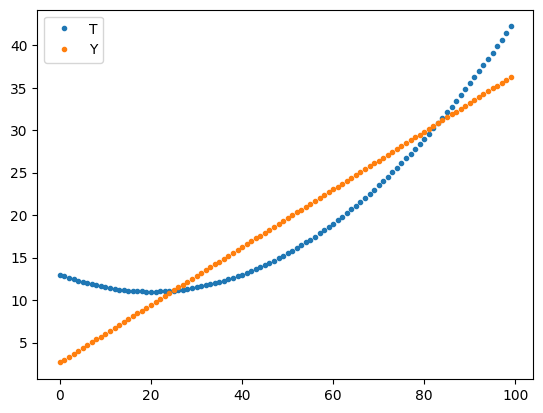

In [8]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

In [9]:
rmse(Y, T)

np.float64(3.941399759526914)

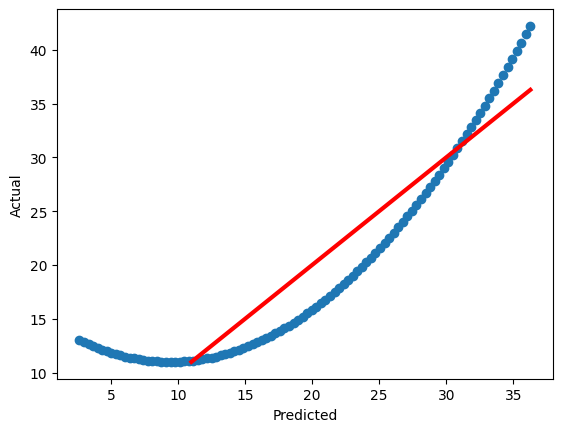

In [10]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [ ]:
df = pandas.read_csv("https://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt", delim_whitespace=True, na_values='***');
df

NameError: name 'pandas' is not defined

## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [35]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [36]:
df = df.dropna(axis=1)
df.isna().sum()

Year        0
Mo          0
Dy          0
tave        0
tmax        0
mxtm        0
tmin        0
mntm        0
vp          0
rhmax       0
rhmxtm      0
rhmin       0
rhmntm      0
sr          0
wrun        0
pp          0
st15mx      0
st15mxtm    0
st15mn      0
st15mntm    0
year        0
gust        0
gusttm      0
etr_asce    0
dtype: int64

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

In [40]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

df.insert(0, 'next tave', pandas.NA, False)

ValueError: cannot insert next tave, already exists

In [41]:
df

,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,...,pp,st15mx,st15mxtm,st15mn,st15mntm,year,gust,gusttm,etr_asce,next tave
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,...,0.000,-1.803,00:00,-3.195,23:00,2019.0,5.155,08:10,0.324,<NA>
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,...,0.508,-2.941,19:00,-4.802,11:00,2019.0,4.332,11:50,0.521,<NA>
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,...,0.000,-1.979,22:00,-4.639,10:00,2019.0,4.096,15:40,0.729,<NA>
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,...,0.000,-0.963,23:00,-2.768,10:00,2019.0,4.096,12:30,0.893,<NA>
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,...,0.000,-0.350,23:00,-1.401,11:00,2019.0,4.077,12:20,0.867,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,...,0.000,0.308,06:00,0.257,14:00,2019.0,4.469,16:00,0.473,<NA>
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,...,0.000,0.298,20:00,0.264,10:00,2019.0,10.623,12:20,0.681,<NA>
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,...,4.064,0.288,00:00,0.219,23:00,2019.0,11.486,07:10,1.039,<NA>
363,2019,12,30,-5.427,1.293,13:40,-12.147,06:20,0.226,0.833,...,0.508,0.200,00:00,-0.150,23:00,2019.0,4.586,14:30,0.504,<NA>


## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [ ]:
X = df.loc[:, Xnames].to_numpy()[:-1, :] # all features and all but last sample
print(X)

T = df.loc[:, 'tave'].to_numpy()[1:].reshape(-1, 1) # only tave feature and all but first sample (i.e. X[0])
print(T)

[[-13.535 -10.073 -16.997 ...   0.595   0.      5.155]
 [ -5.791   6.01  -17.591 ...   0.216   0.508   4.332]
 [  1.374  13.444 -10.696 ...   0.175   0.      4.096]
 ...
 [ -2.695  -1.102  -4.288 ...   0.477   0.     10.623]
 [ -3.731   1.871  -9.333 ...   0.267   4.064  11.486]
 [ -5.427   1.293 -12.147 ...   0.278   0.508   4.586]]
[[ -5.791]
 [  1.374]
 [  4.544]
 [  4.465]
 [  6.484]
 [  3.951]
 [  0.073]
 [ -1.611]
 [  6.022]
 [  3.194]
 [  1.587]
 [ -0.441]
 [  0.164]
 [  1.711]
 [  4.581]
 [  3.755]
 [  1.748]
 [  0.794]
 [  3.699]
 [  1.509]
 [ -2.389]
 [ -2.238]
 [ -4.389]
 [ -4.567]
 [  0.199]
 [  5.772]
 [ -2.951]
 [ -5.122]
 [ -3.679]
 [  1.366]
 [  3.617]
 [  4.365]
 [  8.895]
 [  1.934]
 [ -0.69 ]
 [ -9.659]
 [-15.989]
 [ -9.802]
 [ -5.18 ]
 [ -4.825]
 [ -3.589]
 [  2.783]
 [  6.673]
 [  5.976]
 [  2.393]
 [ -0.857]
 [ -4.927]
 [-11.115]
 [ -8.522]
 [ -5.496]
 [ -4.461]
 [ -5.376]
 [ -0.835]
 [  2.057]
 [  0.91 ]
 [  0.546]
 [ -5.434]
 [  0.958]
 [  3.836]
 [ -9.381]
 [-1

## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

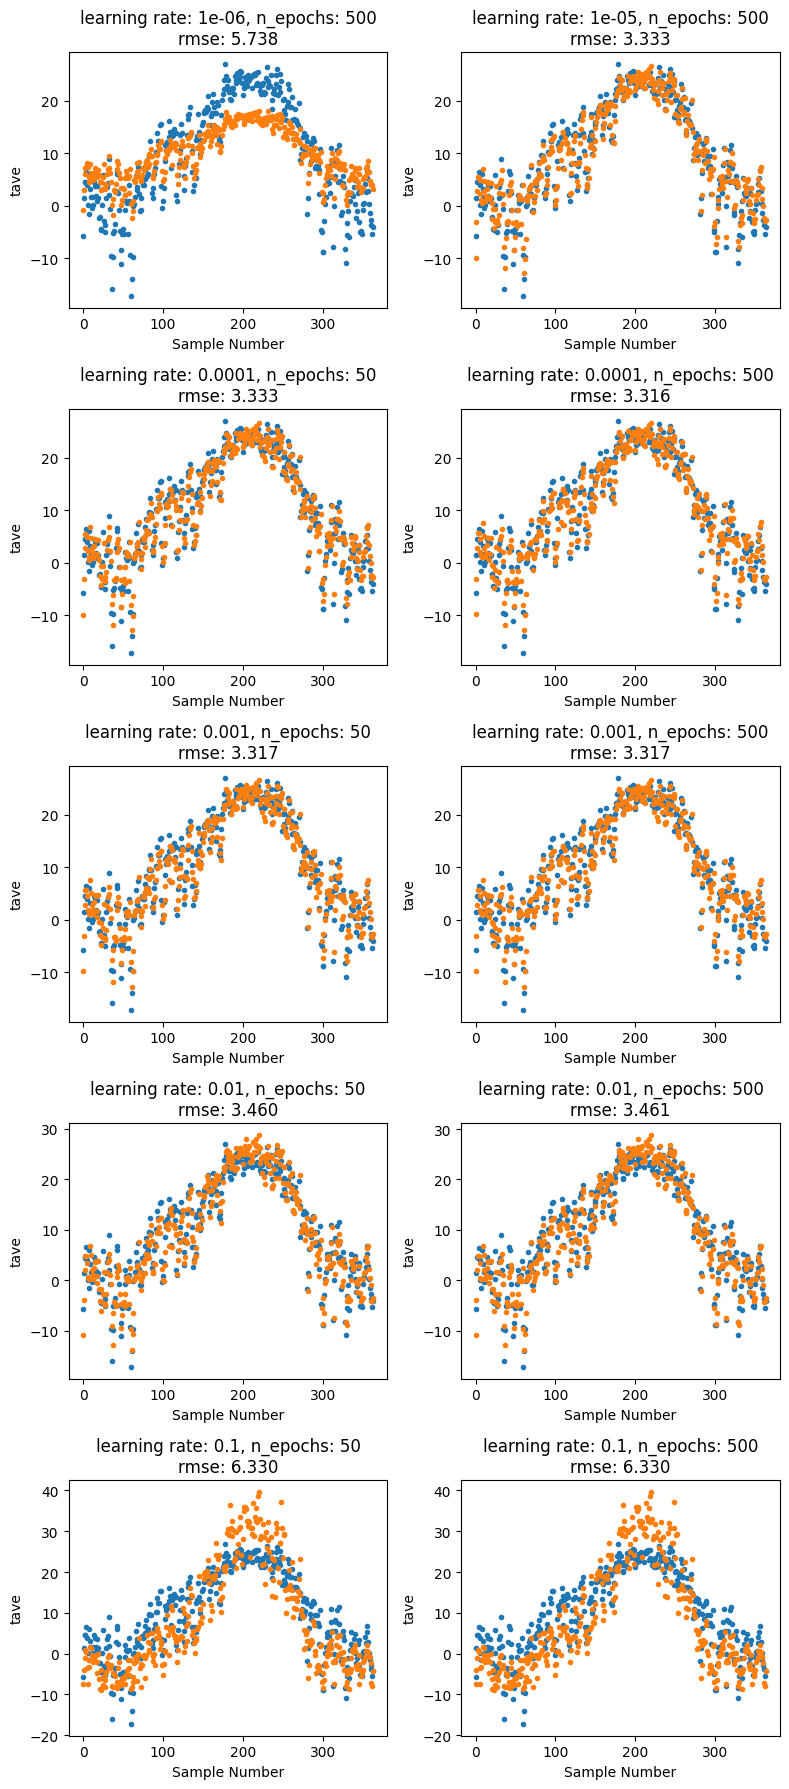

In [107]:
params = [(0.000001, 500), (0.00001, 500),
          (0.0001, 50), (0.0001, 500),
          (0.001, 50), (0.001, 500), 
          (0.01, 50), (0.01, 500), 
          (0.1, 50), (0.1, 500)]

plot_num = 1
plt.figure(figsize=(8, 18))
for lr, epochs in params:
    model = train(X, T, learning_rate=lr, n_epochs=epochs, verbose=False)
    Y = use(X, model)
    err = rmse(Y, T)
    plt.subplot(5, 2, plot_num)
    plot_num += 1
    plt.plot(T, '.', label='T')
    plt.plot(Y, '.', label='Y')
    plt.xlabel('Sample Number')
    plt.ylabel('tave')
    plt.title(f"learning rate: {lr}, n_epochs: {epochs}\nrmse: {err:.3f}")
plt.tight_layout()


In [113]:
tmean = df['tave'].abs().mean()
print("tave absolute mean: ", tmean)

tave absolute mean:  11.357602739726026


The lowest I managed to get the RMSE for this dataset was 3.316 using a learning rate of 0.0001 and 500 epochs. Alone, this is a fairly poor result. The absolute average value of 'tave' is ~11.3, so an RMSE of ~3.3 is fairly large. However, when you look at the related graph, you can see that the model predicted the data trends fairly well and predicts within the range of target values for a given sample group. Therefore, I would say that, while this model would not be good for accurately predicting the exact temperature of the next day, it could be good for predicting overall temperature trends. 

We must also consider the broader context of the data in this situation. Considering the volatile nature of temperature and weather, it is hard to say how much of this error is a failure of the model training methods and how much is simply too difficult for a linear regression model to predict.

## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [ ]:
print(model['w'])


# ignore first(?) value of w as it is related to the bias column added to the data in training
for i in range(len(Xnames)):
    print(f"{Xnames[i]} {model['w'][i + 1]}")



[[-0.17598464]
 [-0.09310228]
 [-0.07132287]
 [-0.08411841]
 [ 1.51173272]
 [-0.08343897]
 [-0.12825668]
 [ 0.01124341]
 [-0.1821084 ]]
tave [-0.09310228]
tmax [-0.07132287]
tmin [-0.08411841]
vp [1.51173272]
rhmax [-0.08343897]
rhmin [-0.12825668]
pp [0.01124341]
gust [-0.1821084]


It seems that the most important predicting factor for temperature by far is the Vapor Pressure (vp) feature. Compared to the 1.5 weight for vapor pressure, each individual other feature has little impact on the resultant prediction. Interestingly, even the temperature values for the previous day have little impact on the prediction for the day's temperature. Assuming that this isn't a failure of the model or data interpretation, this means that the temperature for a given day isn't closely related to the temperature for the previous day, indicating the volatility of predicting temperature without other relevant data.

## Grading and Check-in

Your notebook will be partially graded automatically.  You can test this grading process yourself by downloading [A1grader.zip](https://www.cs.colostate.edu/~cs445/notebooks/A1grader.zip) and extract `A1grader.py` parallel to this notebook.  Run the code in the in the following cell to see an example grading run.  If your functions are defined correctly, you should see a score of 60/60.  The remaining 40 points are based on testing other data and your discussion.

In [18]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Tone-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
  model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12

--- 20/20 points. Returned correct values.

--- 10/10 points. Xmeans and Xstds are correct values.

--- 10/10 points. Tmeans and Tstds are correct values.

Testing
  Y = use(X, model)


--- 10/10 points. Returned correct values.

Testing
  err = rmse(Y, T)


--- 10/10 points. Returned correct values.

c:\Users\Evan\OneDrive - Neumont College of Computer Science\Documents\School\CSU School Stuff\25_Q1_SPRIN

A different but similar grading script will be used to grade yout checked-in notebook.  It will include different tests.

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

In [19]:
T = data[1:, 0:1] -  data[:-1, 0:1]

NameError: name 'data' is not defined

Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.